### Step 1: Import Required Libraries
We start by importing the necessary libraries for this tutorial:

- `pymovements` for eye movement analysis and synthetic data generation.
- `numpy` for numerical operations and array handling.
- `polars` for fast DataFrame operations.

In [1]:
import numpy as np
import polars as pl
import pymovements as pm

### Step 2: Define Experiment Metadata
We define the experimental setup using `pm.gaze.Experiment`. Each parameter describes the physical and technical properties of the experiment:

- `screen_width_px=1280`: The width of the display in pixels.
- `screen_height_px=1024`: The height of the display in pixels.
- `screen_width_cm=38`: The physical width of the display in centimeters.
- `screen_height_cm=30.2`: The physical height of the display in centimeters.
- `distance_cm=68`: The distance from the observer's eyes to the screen in centimeters.
- `origin='upper left'`: The coordinate origin for the screen (upper left corner).
- `sampling_rate=1000`: The sampling rate of the eye tracker in Hertz (samples per second).

In [2]:
experiment = pm.gaze.Experiment(
    screen_width_px=1280,
    screen_height_px=1024,
    screen_width_cm=38,
    screen_height_cm=30.2,
    distance_cm=68,
    origin='upper left',
    sampling_rate=1000,
)

### Step 3: Create Synthetic Gaze Data
We generate synthetic gaze positions using `pm.synthetic.step_function`. This function simulates gaze jumps (steps) between different positions, with optional noise.

Parameters:
- `length=100`: Total number of samples in the generated signal. The output array will have this many time points
- `steps=[0, 35, 50, 80]`: Indices where the gaze position changes (step points). The first step is at 0 (start), then at 35, 50, and 80. The list must be sorted in ascending order and must have the same length as `values`.
- `values=[(20, 70), (50, 200), (200, 200), (170, 100)]`: The gaze position (x, y) in pixels that the signal will take from each corresponding  step onward (until the next step, or the end). For example,  after sample 0, the position is (20, 70), after 35 it's (50, 200), etc
- `start_value=(0, 0)`: The initial gaze position before the first step.
- `noise=15`: The standard deviation of Gaussian noise added to each sample (in pixels).

In [3]:
positions = pm.synthetic.step_function(
    length=100,
    steps=[0, 35, 50, 80],
    values=[(20, 70), (50, 200), (200, 200), (170, 100)],
    start_value=(0, 0),
    noise=15,
)

### Step 4: Create a DataFrame for the Gaze Data
We store the synthetic gaze data in a Polars DataFrame. This DataFrame will have three columns:

- `time`: The sample index (from 0 to 99).
- `x_pix`: The x-coordinate of the gaze in pixels.
- `y_pix`: The y-coordinate of the gaze in pixels.

In [4]:
df = pl.DataFrame({
    'time': np.arange(100),
    'x_pix': positions[:, 0],
    'y_pix': positions[:, 1],
})

### Step 5: Create a Gaze Object
We initialize a `pm.Gaze` object to analyze the gaze data. Parameters:

- The first argument is the DataFrame containing the gaze data.
- `pixel_columns=['x_pix', 'y_pix']`: Specifies which columns in the DataFrame contain the pixel coordinates of the gaze.
- `experiment=experiment`: Passes the experiment metadata defined earlier.

In [5]:
gaze = pm.Gaze(
    df,
    pixel_columns=['x_pix', 'y_pix'],
    experiment=experiment,
)

### Step 6: Visualize the Gaze Trace 
We plot the gaze trace using the built-in plotting function:

- `pm.plotting.traceplot(gaze)`: Visualizes the gaze path.

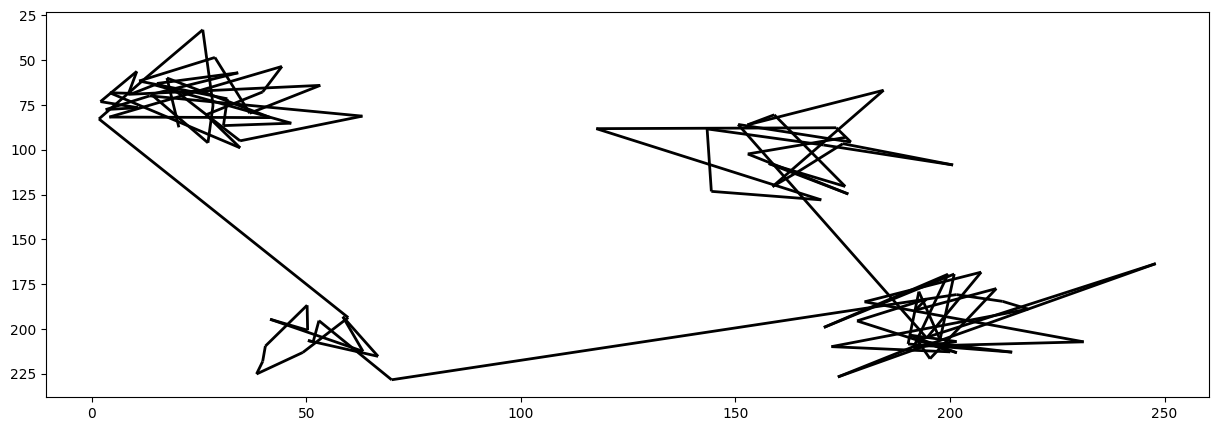

In [6]:
pm.plotting.traceplot(gaze)